# Quantum Teleportation

Contrary to the name, quantum teleportation doesn't actually teleport a qubit physically, but instead teleports the information. Regardless of the distance between the qubits, the information will be reflected on the other qubit instantly, and without any medium required in between (thanks to entanglement).

Of course, this means that the required number of qubits already be present at the receiving end. Copying in the manner classical bits do is not possible, since that would measure the quantum state, effectively destroying the quantum state we're trying to copy.

Since qubits start out in the `|0>` state, we'll `x` `q0` to make it a `|1>`.

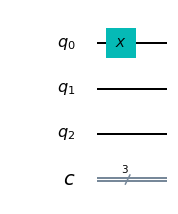

In [20]:
import qiskit
from qiskit.tools import visualization

circuit = qiskit.QuantumCircuit(3, 3)
circuit.x(0)
circuit.draw(output='mpl')

Since quantum teleportation requires that the qubits be entangled, we'll entangle `q1` and `q2`.

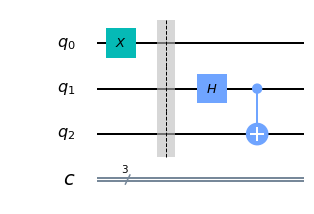

In [21]:
circuit.barrier()
circuit.h(1)
circuit.cx(1, 2)
circuit.draw(output='mpl')

According to the quantum teleportation protocol, we'll need to apply a controlled-NOT and Hadamard gate to `q0` and `q1`.

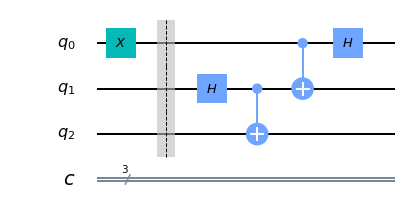

In [22]:
circuit.cx(0, 1)
circuit.h(0)
circuit.draw(output='mpl')

Let's measure `q0` and `q1`.

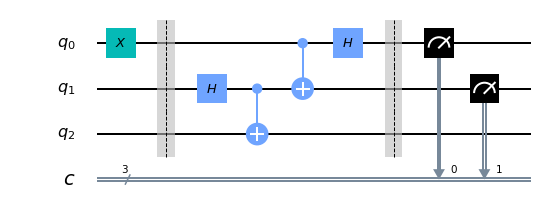

In [23]:
circuit.barrier()
circuit.measure([0, 1], [0, 1])
circuit.draw(output='mpl')

At this point, it's apparently just math and physics, so there's nothing much to "understand" at a high level. We'll just have to apply a controlled-NOT gate, and a controlled-Z gate.

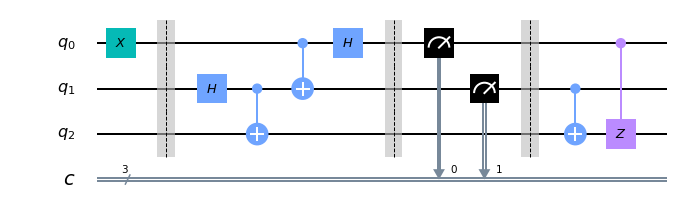

In [24]:
circuit.barrier()
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw(output='mpl')

And now let's measure the final output.

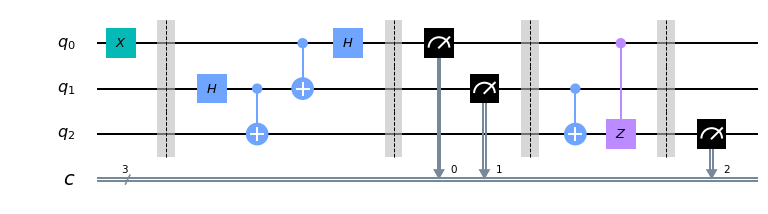

In [25]:
circuit.barrier()
circuit.measure(2, 2)
circuit.draw(output='mpl')

Let's simulate and measure the circuit to verify that information was teleported from `q0` to `q2`.

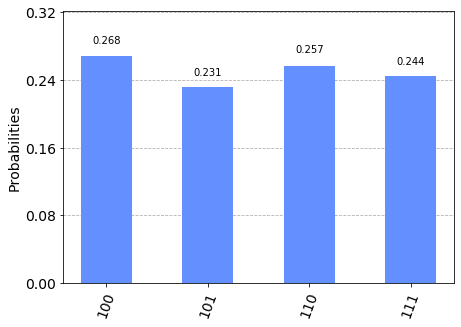

In [26]:
result = qiskit.execute(circuit, backend=qiskit.Aer.get_backend('qasm_simulator'), shots=1024).result()
visualization.plot_histogram(result.get_counts())